Dataset shape: (569, 33)
Feature columns: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Target classes: [1 0]
Confusion Matrix:
 [[71  1]
 [ 3 39]]
Precision: 0.975
Recall: 0.9285714285714286
ROC-AUC: 0.996031746031746
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      

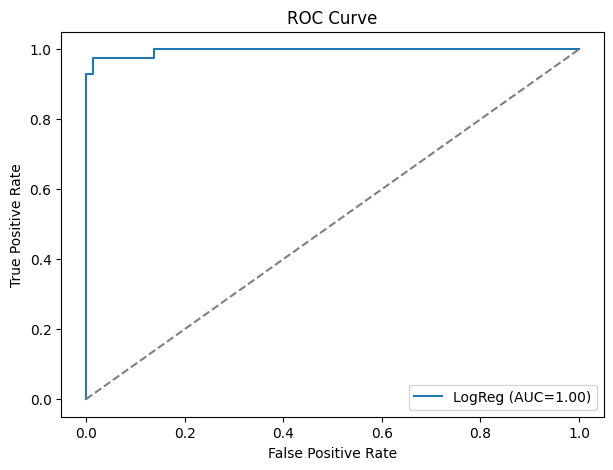

Using threshold = 0.3
Custom Confusion Matrix:
 [[71  1]
 [ 1 41]]
Precision (custom): 0.9761904761904762
Recall (custom): 0.9761904761904762


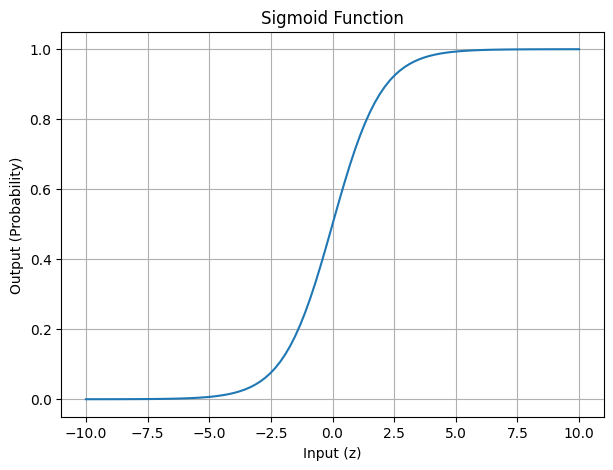

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, precision_score, recall_score,
                             roc_auc_score, roc_curve, classification_report)
import matplotlib.pyplot as plt

# Step 1: Load the Dataset

dataset_path = "/content/data.csv"  # <-- Update to your CSV file path

df = pd.read_csv(dataset_path)
print("Dataset shape:", df.shape)

# Step 2: Prepare Features and Target

target_column = 'diagnosis'  # Target column in this dataset

# Drop columns not useful for prediction
drop_cols = ['id', 'Unnamed: 32']
drop_cols = [col for col in drop_cols if col in df.columns]  # Filter only existing columns
X = df.drop(columns=drop_cols + [target_column])

# Map 'B' and 'M' to 0 and 1
y = df[target_column].map({'B': 0, 'M': 1})

print("Feature columns:", X.columns.tolist())
print("Target classes:", y.unique())

# Step 3: Train/Test Split and Standardize Features

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Fit Logistic Regression Model

lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)


# Step 5: Predict and Evaluate Model

y_pred = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", roc_auc)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'LogReg (AUC={roc_auc:.2f})')
plt.plot([0,1], [0,1], '--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Step 6: Tune Threshold and Explain Sigmoid

custom_threshold = 0.3
y_pred_custom = (y_proba >= custom_threshold).astype(int)

print(f"Using threshold = {custom_threshold}")
print("Custom Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))
print("Precision (custom):", precision_score(y_test, y_pred_custom))
print("Recall (custom):", recall_score(y_test, y_pred_custom))

# Plot Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.figure(figsize=(7,5))
plt.plot(z, sigmoid(z))
plt.title('Sigmoid Function')
plt.xlabel('Input (z)')
plt.ylabel('Output (Probability)')
plt.grid()
plt.show()
